In [30]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, RangeSlider, CustomJS
from bokeh.transform import linear_cmap

In [31]:
%matplotlib notebook

output_notebook()

Loading BokehJS ...

## Немного формул

Аттрактор Лоренца описывается нелинейной системой ОДУ:

$$
\begin{cases} 
        \dot x = \sigma(y - x) \\
        \dot y = x(\rho - z) - y \\
        \dot z = xy - \beta z \\
\end{cases}
$$

где параметры имеют значения $\sigma = 10, \rho = 28, \beta = \frac{8}{3}$

## Немного кода

Зададим значение констант, начального состояния системы и временную сетку.

In [32]:
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

init_state = np.ones(3) # [1., 1., 1.]

ts = np.arange(0.0, 50.0, 0.01) # время t: 0 < t < 50 с шагом 0.01

Определим функцию, описывающую систему ОДУ.

In [33]:
def lorenz(pos, t):
    x, y, z = pos
    return sigma * (y - x), \
           x * (rho - z) - y, \
           x * y - beta * z

Смоделируем аттрактор Лоренца с помощью функции `scipy.integrate.odeint`, вычисляющей состояние системы в каждый момент времени, начиная с начального.

In [34]:
states = odeint(lorenz, init_state, ts)

print(states)
print(states.shape)

[[  1.           1.           1.        ]
 [  1.01256574   1.25992001   0.98489104]
 [  1.04882146   1.52400084   0.97311434]
 ...
 [-11.22402551  -7.43404362  34.34862687]
 [-10.82601893  -6.66993478  34.21176   ]
 [-10.3956746   -5.95933989  33.97234394]]
(5000, 3)


## Немного картинок

<IPython.core.display.Javascript object>


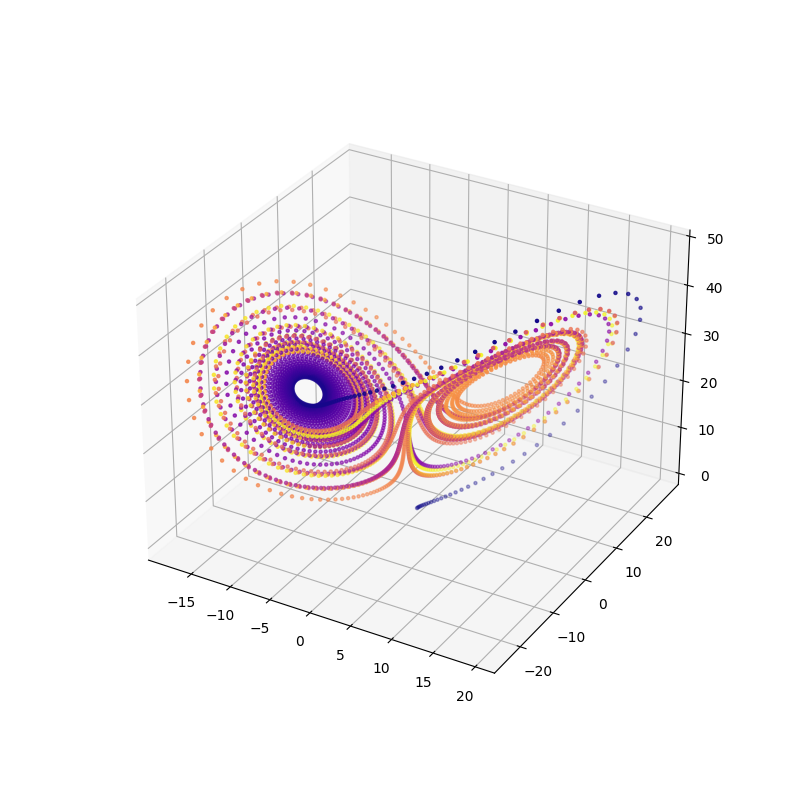

In [35]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection="3d")
ax.scatter(states[:, 0], states[:, 1], states[:, 2], s=5.0, c = ts, cmap = "plasma")

In [69]:
data = {
    "x": states[:, 0],
    "y": states[:, 1],
    "z": states[:, 2],
    "t": ts,
}

fig_params = {
    "plot_width": 400,
    "plot_height": 400,
    "min_border": 30,
    "tools": "pan,box_zoom,box_select,wheel_zoom,save,reset,help",
    "tooltips": [
        ('time', "@t"),
        ("x", "@x"),
        ("y", "@y"),
        ("z", "@z"),
    ]
}

plot_params = {
    "size": 3,
    "alpha": 0.8,
    "color": linear_cmap(field_name='t', palette="Plasma256" , low=data["t"].min(), high=data["t"].max()),
    "source": ColumnDataSource(data),
}

In [72]:
xy = figure(x_axis_label="X", y_axis_label="Y", **fig_params)
xy.circle(x="x", y="y", **plot_params)

xz = figure(x_axis_label="X", y_axis_label="Z", **fig_params)
xz.circle(x="x", y="z", **plot_params)

yz = figure(x_axis_label="Y", y_axis_label="Z", **fig_params)
yz.circle(x="y", y="z", **plot_params)

time_slider = RangeSlider(
    title="Временной диапазон (в шагах временной сетки)",
    start=0,
    end=data["t"].shape[0],
    step=1,
    value=(0, data["t"].shape[0]),
)
time_callback = CustomJS(args=dict(source=plot_params["source"]),
                         code="""
                         source.selected.indices = _.range(this.value[0], this.value[1]);
                         source.change.emit();
                         """)
time_slider.js_on_change("value", time_callback)

grid = gridplot([xy, xz, yz, time_slider], ncols=2, toolbar_location="right")

In [73]:
show(grid)